In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import Model
%matplotlib inline

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 4
model = Sequential()
model.add(ResNet50(include_top = False, 
                   weights=None, 
                   input_shape = (256, 256, 3), classes = NUM_CLASSES))

## Add in last 3 layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.load_weights('/Users/ankithgunapal/Documents/berkeley/w210/project/model/weights-improvement-13-0.65.hdf5')

In [3]:
test_file = "/Users/ankithgunapal/Documents/berkeley/w210/project/data/Calc-Test_P_00038_LEFT_CC"

In [4]:
img = cv2.imread(test_file)
img.shape

(4616, 3016, 3)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4100      
Total para

Total time taken in seconds is  37.8639881611


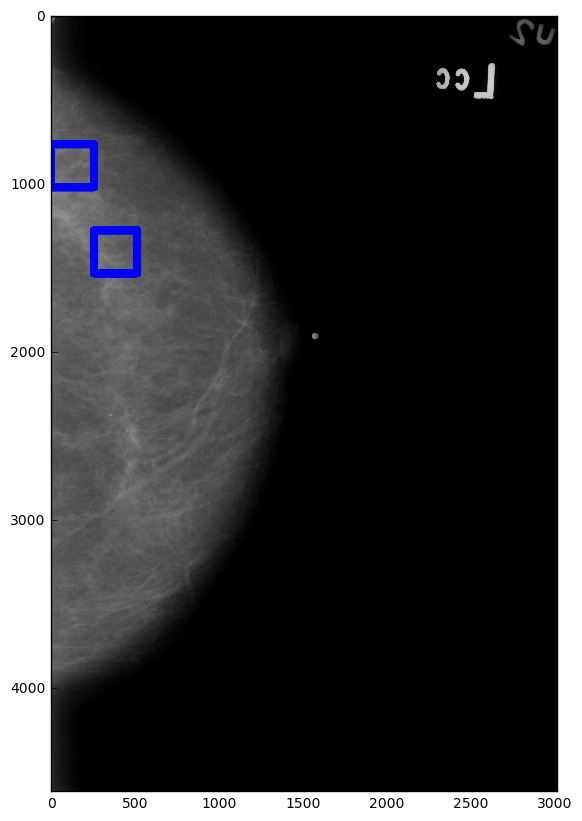

In [10]:
import time

start = time.time()
WIDTH = HEIGHT = 256

blue = (0,0,255)
red = (255,0,0)
green = (0,255,0)

color = {0:blue,2:red,1:green}

i = 0
plt.figure(figsize=(20,10))
for height in range(0, img.shape[0], HEIGHT):
    for width in range(0,img.shape[1],WIDTH):
        
        if (img.shape[0] - height) < HEIGHT or (img.shape[1] - width) < WIDTH:
            continue
        i += 1
        row = img.shape[0]/HEIGHT 
        col = img.shape[1]/WIDTH
        crop = np.expand_dims(img[height:height+HEIGHT, width:width+WIDTH,:], axis=0)
        
        #print (np.mean(crop))
        if np.mean(crop) > 10:
            #print (i)
            #print height, width, crop.shape
            classes = model.predict(crop)
            if classes.argmax(axis=-1).item(0) == 3:
                continue
            #print (np.max(classes))
            #print (classes.argmax(axis=-1).item(0))
            cv2.rectangle(img,(width,height), ( width+WIDTH, height +HEIGHT), color[classes.argmax(axis=-1).item(0)],50)
            
            #print (color[classes.argmax(axis=-1).item(0)])
            #print (width,height)
                              
            
plt.imshow(img)  

end = time.time()

print "Total time taken in seconds is ", end-start